In [ ]:
import pandas as pd
import numpy as np

In [ ]:
X_test = pd.read_csv('X_test.csv')
X_train = pd.read_csv('X_train.csv')
y_test = pd.read_csv('y_test.csv')
y_train = pd.read_csv('y_train.csv')

# Sử dụng mô hình base - hồi quy tuyến tính

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# tap huan luyen
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)

#tap kiem tra
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

print("Tap huan luyen : ")
print("MSE:", train_mse)
print("RMSE:", train_rmse)
print("R-squared:", train_r2)
print("**************")
print("Tap kiem tra: ")
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R-squared:", test_r2)

Tap huan luyen : 
MSE: 0.11390972555133955
RMSE: 0.3375051489256713
R-squared: 0.29451609557224045
**************
Tap kiem tra: 
MSE: 0.1113179200841454
RMSE: 0.3336434025784796
R-squared: 0.2647421642087219


Text(0.5, 1.0, 'Histogram of y_pred')

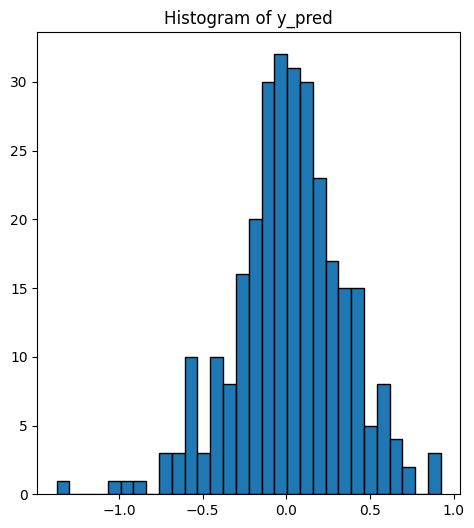

In [ ]:
import matplotlib.pyplot as plt
df_y_pred = pd.DataFrame(y_test_pred, columns=['y_pred'])
error = df_y_pred['y_pred'].values - y_test['SalePrice'].values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(error, bins=30, edgecolor='k')
plt.title('Histogram of y_pred')

# Sử dụng hồi quy Rige và Hồi quy Lasso

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
ridge_best = ridge_cv.best_estimator_

y_test_pred_ridge = ridge_best.predict(X_test)
y_train_pred_ridge = ridge_best.predict(X_train)

train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
train_rmse_ridge = mean_squared_error(y_train, y_train_pred_ridge, squared=False)
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)


test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
test_rmse_ridge = mean_squared_error(y_test, y_test_pred_ridge, squared=False)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)


print("Ridge Regression - Best alpha:", ridge_cv.best_params_['alpha'])
print("train MSE (Ridge):", train_mse_ridge)
print("train RMSE (Ridge):", train_rmse_ridge)
print("train R-squared (Ridge):", train_r2_ridge)


print("test MSE (Ridge):", test_mse_ridge)
print("Test RMSE (Ridge):", test_rmse_ridge)
print("Test R-squared (Ridge):", test_r2_ridge)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.03673e-269): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.90786e-269): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.66729e-268): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.06429e-268): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWa

Ridge Regression - Best alpha: 10.0
train MSE (Ridge): 0.00998922996385952
train RMSE (Ridge): 0.09994613531227468
train R-squared (Ridge): 0.9381331056411495
test MSE (Ridge): 0.02675818529285161
Test RMSE (Ridge): 0.16357929359442658
Test R-squared (Ridge): 0.8232614713493358


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.80065e-267): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Text(0.5, 1.0, 'Histogram of y_pred')

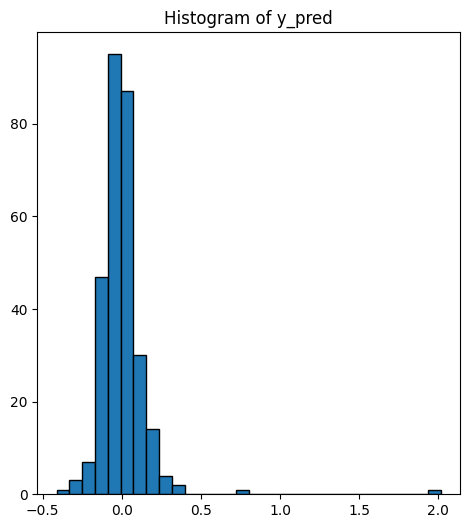

In [ ]:
import matplotlib.pyplot as plt
df_y_pred = pd.DataFrame(y_test_pred_ridge, columns=['y_pred'])
error = df_y_pred['y_pred'].values - y_test['SalePrice'].values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(error, bins=30, edgecolor='k')
plt.title('Histogram of y_pred')

In [ ]:
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)
lasso_best = lasso_cv.best_estimator_

y_test_pred_lasso = lasso_best.predict(X_test)
y_train_pred_lasso = lasso_best.predict(X_train)

train_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
train_rmse_lasso = mean_squared_error(y_train, y_train_pred_lasso, squared=False)
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)


test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
test_rmse_lasso = mean_squared_error(y_test, y_test_pred_lasso, squared=False)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

print("Ridge Regression - Best alpha:", lasso_cv.best_params_['alpha'])
print("train MSE (Ridge):", train_mse_lasso)
print("train RMSE (Ridge):", train_rmse_lasso)
print("train R-squared (Ridge):", train_r2_lasso)


print("test MSE (Ridge):", test_mse_lasso)
print("Test RMSE (Ridge):", test_rmse_lasso)
print("Test R-squared (Ridge):", test_r2_lasso)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.214e+01, tolerance: 1.537e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.966e+01, tolerance: 1.479e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.042e+01, tolerance: 1.432e

Ridge Regression - Best alpha: 0.1
train MSE (Ridge): 0.03885321690831589
train RMSE (Ridge): 0.19711219370783709
train R-squared (Ridge): 0.7593680519254398
test MSE (Ridge): 0.06076398644126811
Test RMSE (Ridge): 0.24650352216807797
Test R-squared (Ridge): 0.5986522463671098


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.673e+01, tolerance: 1.886e-02
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'Histogram of y_pred')

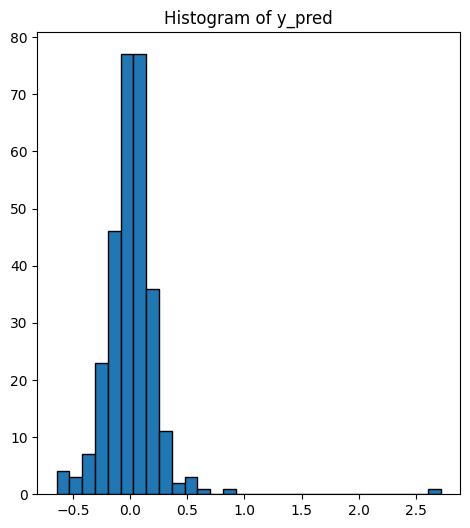

In [ ]:
import matplotlib.pyplot as plt
df_y_pred = pd.DataFrame(y_test_pred_lasso, columns=['y_pred'])
error = df_y_pred['y_pred'].values - y_test['SalePrice'].values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(error, bins=30, edgecolor='k')
plt.title('Histogram of y_pred')

Lasso Regression - Best alpha: 0.1
Test MSE (Lasso): 0.06076398644126811
Test RMSE (Lasso): 0.24650352216807797
Test R-squared (Lasso): 0.5986522463671098


In [ ]:
from skopt import BayesSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


ridge = Ridge()

param_space = {'alpha': (0.1, 100.0)}

ridge_search = BayesSearchCV(ridge, param_space, n_iter=50, cv=20, scoring='neg_mean_squared_error', n_jobs=-1)

ridge_search.fit(X_train, y_train)

ridge_best = ridge_search.best_estimator_

y_test_pred_ridge = ridge_best.predict(X_test)
y_train_pred_ridge = ridge_best.predict(X_train)

train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
train_rmse_ridge = mean_squared_error(y_train, y_train_pred_ridge, squared=False)
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)

test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
test_rmse_ridge = mean_squared_error(y_test, y_test_pred_ridge, squared=False)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

print("Ridge Regression - Best alpha:", ridge_search.best_params_['alpha'])
print("Train MSE (Ridge):", train_mse_ridge)
print("Train RMSE (Ridge):", train_rmse_ridge)
print("Train R-squared (Ridge):", train_r2_ridge)
print("Test MSE (Ridge):", test_mse_ridge)
print("Test RMSE (Ridge):", test_rmse_ridge)
print("Test R-squared (Ridge):", test_r2_ridge)


Ridge Regression - Best alpha: 99.99586805119246
Train MSE (Ridge): 0.18248638696791136
Train RMSE (Ridge): 0.4271842541198252
Train R-squared (Ridge): -0.13020383606326025
Test MSE (Ridge): 0.17329130226210532
Test RMSE (Ridge): 0.41628271914902415
Test R-squared (Ridge): -0.14459368057160482


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'l1_ratio': [0.1, 0.5, 0.9]  # Thêm l1_ratio để điều chỉnh tỷ lệ giữa L1 và L2
}

elastic_net = ElasticNet()

elastic_net_cv = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error')

elastic_net_cv.fit(X_train, y_train)

elastic_net_best = elastic_net_cv.best_estimator_

y_test_pred_elastic = elastic_net_best.predict(X_test)
y_train_pred_elastic = elastic_net_best.predict(X_train)

train_mse_elastic = mean_squared_error(y_train, y_train_pred_elastic)
train_rmse_elastic = mean_squared_error(y_train, y_train_pred_elastic, squared=False)
train_r2_elastic = r2_score(y_train, y_train_pred_elastic)

test_mse_elastic = mean_squared_error(y_test, y_test_pred_elastic)
test_rmse_elastic = mean_squared_error(y_test, y_test_pred_elastic, squared=False)
test_r2_elastic = r2_score(y_test, y_test_pred_elastic)

print("Elastic Net - Best parameters:", elastic_net_cv.best_params_)
print("train MSE (Elastic Net):", train_mse_elastic)
print("train RMSE (Elastic Net):", train_rmse_elastic)
print("train R-squared (Elastic Net):", train_r2_elastic)

print("test MSE (Elastic Net):", test_mse_elastic)
print("Test RMSE (Elastic Net):", test_rmse_elastic)
print("Test R-squared (Elastic Net):", test_r2_elastic)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.453e+01, tolerance: 1.537e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.229e+01, tolerance: 1.479e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.312e+01, tolerance: 1.432e

Elastic Net - Best parameters: {'alpha': 0.1, 'l1_ratio': 0.1}
train MSE (Elastic Net): 0.023456734015820633
train RMSE (Elastic Net): 0.1531559140739287
train R-squared (Elastic Net): 0.8547240086962884
test MSE (Elastic Net): 0.041861052017045305
Test RMSE (Elastic Net): 0.20459973611186624
Test R-squared (Elastic Net): 0.7235066331931714


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.725e+01, tolerance: 1.886e-02
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'Histogram of y_pred')

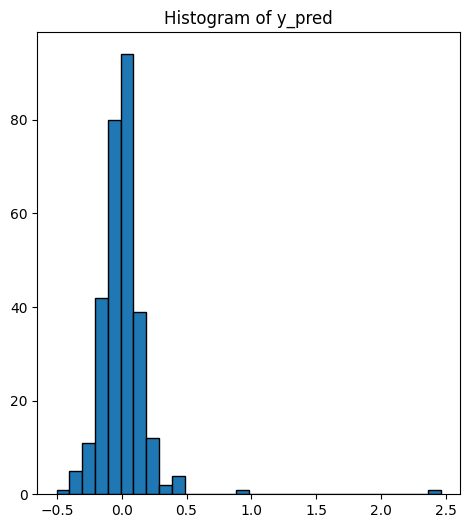

In [ ]:
import matplotlib.pyplot as plt
df_y_pred = pd.DataFrame(y_test_pred_elastic, columns=['y_pred'])
error = df_y_pred['y_pred'].values - y_test['SalePrice'].values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(error, bins=30, edgecolor='k')
plt.title('Histogram of y_pred')